<a href="https://colab.research.google.com/github/quanap5kr/DeepResource/blob/master/PreparationData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Authonization

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


### Source of data


The available data include three datasets as input:

- Training data: It is the aircraft engine run to filure data.
- Testing data: It is the aircraft engine operating data without failure events recorded
- Ground truth data: It contains the information of true remaining cycles for each engine in the testing data

In [0]:
!mkdir PdM

In [18]:
!pwd

/content


In [3]:
#download the training data
!wget http://azuremlsamples.azureml.net/templatedata/PM_train.txt -O PM_train.txt
#download the testing data
!wget http://azuremlsamples.azureml.net/templatedata/PM_test.txt -O PM_test.txt
#download the groundtruth data
!wget http://azuremlsamples.azureml.net/templatedata/PM_truth.txt -O PM_truth.txt

--2019-08-30 06:09:34--  http://azuremlsamples.azureml.net/templatedata/PM_train.txt
Resolving azuremlsamples.azureml.net (azuremlsamples.azureml.net)... 13.107.246.10, 2620:1ec:bdf::10
Connecting to azuremlsamples.azureml.net (azuremlsamples.azureml.net)|13.107.246.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3515356 (3.4M) [text/plain]
Saving to: ‘PM_train.txt’

PM_train.txt        100%[===================>]   3.35M  8.97MB/s    in 0.4s    

2019-08-30 06:09:35 (8.97 MB/s) - ‘PM_train.txt’ saved [3515356/3515356]

--2019-08-30 06:09:37--  http://azuremlsamples.azureml.net/templatedata/PM_test.txt
Resolving azuremlsamples.azureml.net (azuremlsamples.azureml.net)... 13.107.246.10, 2620:1ec:bdf::10
Connecting to azuremlsamples.azureml.net (azuremlsamples.azureml.net)|13.107.246.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2228855 (2.1M) [text/plain]
Saving to: ‘PM_test.txt’

PM_test.txt         100%[===================>]   2.

### Data Ingestion


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
############TRAINING DATA######################
# read training data and add field column
train_df = pd.read_csv('PM_train.txt', sep=" ", header=None)
train_df.drop(train_df.columns[[26, 27]], axis=1, inplace=True) #ignore Nan value at 2 last column
train_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3',
                    's1', 's2', 's3','s4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
train_df.sort_values(['id','cycle'])

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,21.61,554.67,2388.02,9049.68,1.3,47.16,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,21.61,554.34,2388.02,9059.13,1.3,47.36,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,21.61,553.85,2388.00,9040.80,1.3,47.24,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,21.61,553.69,2388.05,9046.46,1.3,47.29,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,21.61,553.59,2388.05,9051.70,1.3,47.03,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694


In [6]:
############TESTING DATA######################
# read training data and add field column
test_df = pd.read_csv('PM_test.txt', sep=" ", header=None)
test_df.drop(test_df.columns[[26, 27]], axis=1, inplace=True) #ignore Nan value at 2 last column
test_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3',
                    's1', 's2', 's3','s4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
test_df.sort_values(['id','cycle'])

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
5,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,21.61,554.22,2388.00,9050.96,1.3,47.26,521.92,2388.08,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467
6,1,7,-0.0000,0.0002,100.0,518.67,642.11,1583.34,1404.84,14.62,21.61,553.89,2388.05,9051.39,1.3,47.31,522.01,2388.06,8134.97,8.3914,0.03,391,2388,100.0,38.85,23.3952
7,1,8,0.0006,-0.0000,100.0,518.67,642.54,1580.89,1400.89,14.62,21.61,553.59,2388.05,9052.86,1.3,47.21,522.09,2388.06,8125.93,8.4213,0.03,393,2388,100.0,39.05,23.3224
8,1,9,-0.0036,0.0000,100.0,518.67,641.88,1593.29,1412.28,14.62,21.61,554.49,2388.06,9048.55,1.3,47.37,522.03,2388.05,8134.15,8.4353,0.03,391,2388,100.0,39.10,23.4521
9,1,10,-0.0025,-0.0001,100.0,518.67,642.07,1585.25,1398.64,14.62,21.61,554.28,2388.04,9051.95,1.3,47.14,522.00,2388.06,8134.08,8.4093,0.03,391,2388,100.0,38.87,23.3820


In [0]:
############GROUNDTRUTH DATA######################
truth_df = pd.read_csv('PM_truth.txt', sep=" ", header=None)
truth_df.drop(truth_df.columns[[1]], axis=1, inplace=True)

#### Sample of training data

In [8]:
train_df.head(100)

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,21.61,554.67,2388.02,9049.68,1.3,47.16,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,21.61,554.34,2388.02,9059.13,1.3,47.36,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,21.61,553.85,2388.00,9040.80,1.3,47.24,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,21.61,553.69,2388.05,9046.46,1.3,47.29,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,21.61,553.59,2388.05,9051.70,1.3,47.03,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694


The data schema for the training and testing data is shown in the following.

- id: Integer, aircraft engine identifier range [1, 100]
- cycle: Integer, time in cycles
- setting1: Double, operational setting 1
- setting2: Double, operational setting 2
- setting3: Double, operational setting 3
- s1: Double, sensor measurement 1
- s2: Double, sensor measuremnet 2
- s3: Double, sensor measurement 3
...
-s21: Double, sensor measurement 21


#### Sample of testting data

In [9]:
test_df.head(100)

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
5,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,21.61,554.22,2388.00,9050.96,1.3,47.26,521.92,2388.08,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467
6,1,7,-0.0000,0.0002,100.0,518.67,642.11,1583.34,1404.84,14.62,21.61,553.89,2388.05,9051.39,1.3,47.31,522.01,2388.06,8134.97,8.3914,0.03,391,2388,100.0,38.85,23.3952
7,1,8,0.0006,-0.0000,100.0,518.67,642.54,1580.89,1400.89,14.62,21.61,553.59,2388.05,9052.86,1.3,47.21,522.09,2388.06,8125.93,8.4213,0.03,393,2388,100.0,39.05,23.3224
8,1,9,-0.0036,0.0000,100.0,518.67,641.88,1593.29,1412.28,14.62,21.61,554.49,2388.06,9048.55,1.3,47.37,522.03,2388.05,8134.15,8.4353,0.03,391,2388,100.0,39.10,23.4521
9,1,10,-0.0025,-0.0001,100.0,518.67,642.07,1585.25,1398.64,14.62,21.61,554.28,2388.04,9051.95,1.3,47.14,522.00,2388.06,8134.08,8.4093,0.03,391,2388,100.0,38.87,23.3820


#### Sample of ground truth data

In [10]:
truth_df.head(20)

,0
0,112
1,98
2,69
3,82
4,91
5,93
6,91
7,95
8,111
9,96


### Data Label

Based on the input data description we have walked through in the previous section, an intuitive predictive maintenance question to ask is.


![](https://raw.githubusercontent.com/quanap5kr/PdM/master/formulaProblem.PNG)

We will reformulate the above question into three closely relevant questions and answer them using three different types of machine learning models.

- Regression models: How many time points will last before failure occur?
- Binary classification: Is this engine going to fail within W1 time points window?
- Multi-class classification: Is this engine going to fail within [1, W0] or [W0+1, W1]

 Depend on which approach used for solving problem, we will label the training data with respective label including "RUL", "label1", "label2".
 
 ![](https://raw.githubusercontent.com/quanap5kr/PdM/master/label01.PNG)

In [19]:
from sklearn import preprocessing
# Data Labeling - generate column RUL(Remaining Usefull Life or Time to Failure)
rul = pd.DataFrame(train_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
# print(rul)
train_df = train_df.merge(rul, on=['id'], how='left')
train_df['RUL'] = train_df['max'] - train_df['cycle']
train_df.drop('max', axis=1, inplace=True)
# Configure the size of window
w1 = 30
w0 = 15
train_df['label1'] = np.where(train_df['RUL'] <= w1, 1, 0 )
train_df['label2'] = train_df['label1']
train_df.loc[train_df['RUL'] <= w0, 'label2'] = 2

# Normalization data to range of [0, 1]
train_df['cycle_norm'] = train_df['cycle']
cols_normalize = train_df.columns.difference(['id','cycle','RUL','label1','label2'])
cols_normalize
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]), 
                             columns=cols_normalize, 
                             index=train_df.index)

norm_train_df.head()
join_df = train_df[train_df.columns.difference(cols_normalize)].join(norm_train_df)
train_df = join_df.reindex(columns = train_df.columns)
train_df.head(1000)

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL,label1,label2,cycle_norm
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,1.0,0.726248,0.242424,0.109755,0.0,0.369048,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,191,0,0,0.000000
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,1.0,0.628019,0.212121,0.100242,0.0,0.380952,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,190,0,0,0.002770
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,1.0,0.710145,0.272727,0.140043,0.0,0.250000,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,189,0,0,0.005540
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,1.0,0.740741,0.318182,0.124518,0.0,0.166667,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,188,0,0,0.008310
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,1.0,0.668277,0.242424,0.149960,0.0,0.255952,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,187,0,0,0.011080
5,1,6,0.252874,0.416667,0.0,0.0,0.268072,0.292784,0.272113,0.0,1.0,0.776167,0.181818,0.125415,0.0,0.184524,0.637527,0.220588,0.169832,0.330512,0.0,0.250000,0.0,0.0,0.651163,0.652720,186,0,0,0.013850
6,1,7,0.557471,0.583333,0.0,0.0,0.382530,0.463920,0.261985,0.0,1.0,0.723027,0.181818,0.167818,0.0,0.303571,0.773987,0.220588,0.167097,0.278953,0.0,0.333333,0.0,0.0,0.744186,0.667219,185,0,0,0.016620
7,1,8,0.304598,0.750000,0.0,0.0,0.406627,0.259865,0.316003,0.0,1.0,0.644122,0.151515,0.085569,0.0,0.232143,0.805970,0.220588,0.160646,0.318199,0.0,0.250000,0.0,0.0,0.643411,0.574979,184,0,0,0.019391
8,1,9,0.545977,0.583333,0.0,0.0,0.274096,0.434707,0.211850,0.0,1.0,0.618357,0.227273,0.110967,0.0,0.261905,0.660981,0.250000,0.132883,0.184302,0.0,0.333333,0.0,0.0,0.705426,0.707539,183,0,0,0.022161
9,1,10,0.310345,0.583333,0.0,0.0,0.150602,0.440375,0.307394,0.0,1.0,0.602254,0.227273,0.134479,0.0,0.107143,0.660981,0.264706,0.151925,0.399000,0.0,0.416667,0.0,0.0,0.627907,0.794256,182,0,0,0.024931


#### Statistic for training data

The goal is to calculate the following statistics using the pandas package:

- Mean value
- Median value
- Total sum of value
- Minimum value
- Maximum value
- Count
- unique values
- Standard deviation of values
- Variance of values


In [0]:
# define function to calculate statistic information
def statistic_PdM(col):
  print("STATISTICS")
  mean1 = train_df[col].mean()
  median1 = train_df[col].median()
  sum1 = train_df[col].sum()
  min1 = train_df[col].min()
  max1 = train_df[col].max()
  count1 = train_df[col].count()
  uniques1 = len(train_df[col].unique())
  missing1 = train_df[col].isnull().sum()
  std1 = train_df[col].std()
  var1 = train_df[col].var()

  # print
  print("Mean: "+ str(mean1))
  print("Median: "+ str(median1))
  print("Sum: "+ str(sum1))
  print("Min: "+ str(min1))
  print("Max: "+ str(max1))
  print("Total Count: "+ str(count1))
  print("Unique Values: "+ str(uniques1))
  print("Missing Values: "+ str(missing1))
  print("Standard Deviation: "+ str(std1))
  print("Variance: "+ str(var1))
  
def histogram_PdM(col):
  print("VISUALIZATIONS")
  print(col)
  print("Histogram")
  df = train_df[col]
  df.hist(bins = 12, rwidth=0.8)
  plt.show()

statistic_PdM("s1")
histogram_PdM("s1")
statistic_PdM("s2")
histogram_PdM("s2")

id
STATISTICS
Mean: 51.506567786340945
Median: 52.0
Sum: 1062632
Min: 1
Max: 100
Total Count: 20631
Unique Values: 100
Missing Values: 0
Standard Deviation: 29.227632908799244
Variance: 854.2545254515245
VISUALIZATIONS
id
Histogram


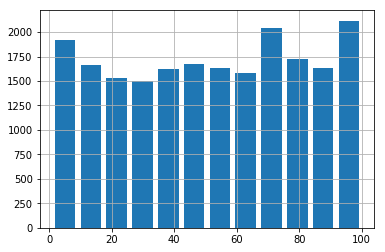

cycle
STATISTICS
Mean: 108.80786195530997
Median: 104.0
Sum: 2244815
Min: 1
Max: 362
Total Count: 20631
Unique Values: 362
Missing Values: 0
Standard Deviation: 68.88099017721821
Variance: 4744.590807794031
VISUALIZATIONS
cycle
Histogram


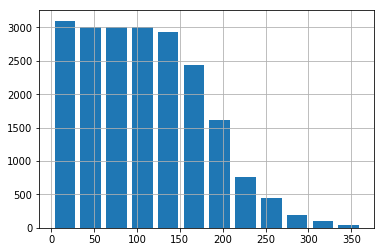

setting1
STATISTICS
Mean: 0.4994902214444654
Median: 0.5
Sum: 10304.98275862069
Min: 0.0
Max: 1.0
Total Count: 20631
Unique Values: 158
Missing Values: 0
Standard Deviation: 0.12570766948363188
Variance: 0.015802418167006036
VISUALIZATIONS
setting1
Histogram


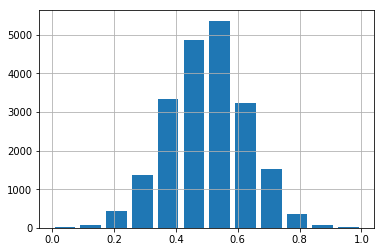

setting2
STATISTICS
Mean: 0.5019590260611053
Median: 0.5
Sum: 10355.916666666668
Min: 0.0
Max: 1.0
Total Count: 20631
Unique Values: 13
Missing Values: 0
Standard Deviation: 0.24421843713843072
Variance: 0.05964264503833763
VISUALIZATIONS
setting2
Histogram


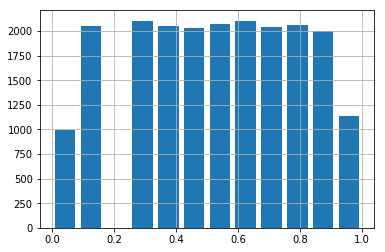

setting3
STATISTICS
Mean: 0.0
Median: 0.0
Sum: 0.0
Min: 0.0
Max: 0.0
Total Count: 20631
Unique Values: 1
Missing Values: 0
Standard Deviation: 0.0
Variance: 0.0
VISUALIZATIONS
setting3
Histogram


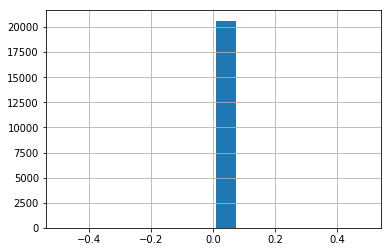

s1
STATISTICS
Mean: 0.0
Median: 0.0
Sum: 0.0
Min: 0.0
Max: 0.0
Total Count: 20631
Unique Values: 1
Missing Values: 0
Standard Deviation: 0.0
Variance: 0.0
VISUALIZATIONS
s1
Histogram


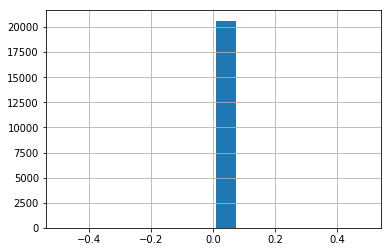

s2
STATISTICS
Mean: 0.4430522730736785
Median: 0.430722891566262
Sum: 9140.611445783114
Min: 0.0
Max: 1.0
Total Count: 20631
Unique Values: 310
Missing Values: 0
Standard Deviation: 0.15061845483753925
Variance: 0.022685918937647848
VISUALIZATIONS
s2
Histogram


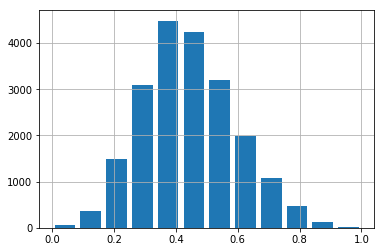

s3
STATISTICS
Mean: 0.42474642703118026
Median: 0.41552212775234665
Sum: 8762.94353608029
Min: 0.0
Max: 1.0
Total Count: 20631
Unique Values: 3012
Missing Values: 0
Standard Deviation: 0.13366360409179906
Variance: 0.017865959058809205
VISUALIZATIONS
s3
Histogram


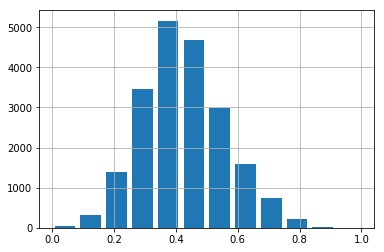

s4
STATISTICS
Mean: 0.45043520742321874
Median: 0.4353477380148547
Sum: 9292.928764348413
Min: 0.0
Max: 1.0
Total Count: 20631
Unique Values: 4051
Missing Values: 0
Standard Deviation: 0.15193458441160862
Variance: 0.023084117940328223
VISUALIZATIONS
s4
Histogram


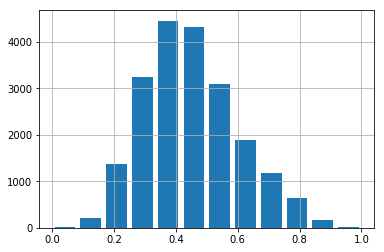

s5
STATISTICS
Mean: 0.0
Median: 0.0
Sum: 0.0
Min: 0.0
Max: 0.0
Total Count: 20631
Unique Values: 1
Missing Values: 0
Standard Deviation: 0.0
Variance: 0.0
VISUALIZATIONS
s5
Histogram


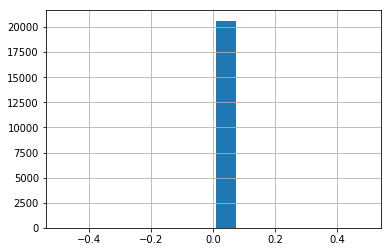

s6
STATISTICS
Mean: 0.9803208763511221
Median: 1.0
Sum: 20225.0
Min: 0.0
Max: 1.0
Total Count: 20631
Unique Values: 2
Missing Values: 0
Standard Deviation: 0.13889849127073903
Variance: 0.019292790877287566
VISUALIZATIONS
s6
Histogram


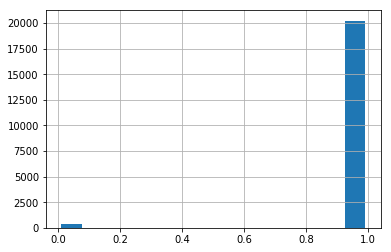

s7
STATISTICS
Mean: 0.5664591322518506
Median: 0.5780998389694076
Sum: 11686.61835748791
Min: 0.0
Max: 1.0
Total Count: 20631
Unique Values: 513
Missing Values: 0
Standard Deviation: 0.14252693360119403
Variance: 0.020313926801759176
VISUALIZATIONS
s7
Histogram


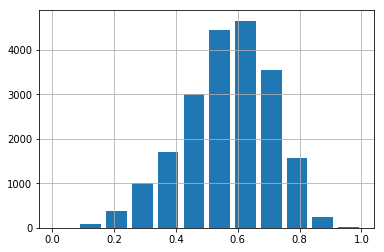

s8
STATISTICS
Mean: 0.29795703141632884
Median: 0.2878787878789808
Sum: 6147.15151515028
Min: 0.0
Max: 1.0
Total Count: 20631
Unique Values: 53
Missing Values: 0
Standard Deviation: 0.1075537558953646
Variance: 0.011567810407199675
VISUALIZATIONS
s8
Histogram


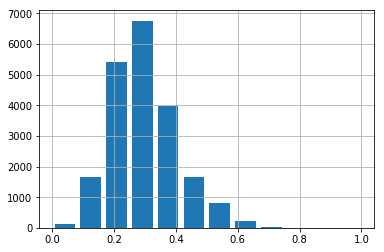

s9
STATISTICS
Mean: 0.1952478718490331
Median: 0.1746836579018236
Sum: 4028.158844117396
Min: 0.0
Max: 1.0
Total Count: 20631
Unique Values: 6403
Missing Values: 0
Standard Deviation: 0.09908857365640435
Variance: 0.00981854542926067
VISUALIZATIONS
s9
Histogram


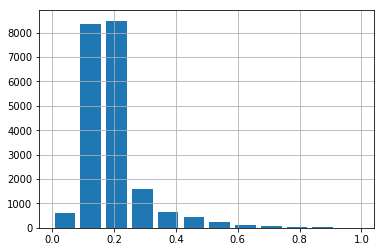

s10
STATISTICS
Mean: 0.0
Median: 0.0
Sum: 0.0
Min: 0.0
Max: 0.0
Total Count: 20631
Unique Values: 1
Missing Values: 0
Standard Deviation: 0.0
Variance: 0.0
VISUALIZATIONS
s10
Histogram


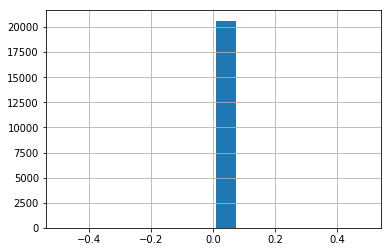

s11
STATISTICS
Mean: 0.41140961013362015
Median: 0.39285714285714235
Sum: 8487.79166666668
Min: 0.0
Max: 1.0
Total Count: 20631
Unique Values: 159
Missing Values: 0
Standard Deviation: 0.1589805944283841
Variance: 0.025274829404802357
VISUALIZATIONS
s11
Histogram


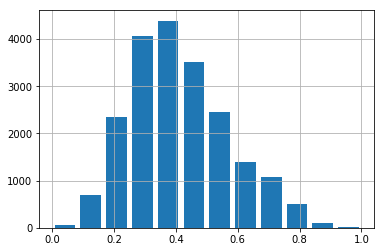

s12
STATISTICS
Mean: 0.5806972325890045
Median: 0.5948827292110934
Sum: 11980.364605543697
Min: 0.0
Max: 1.0
Total Count: 20631
Unique Values: 427
Missing Values: 0
Standard Deviation: 0.1572608512174252
Variance: 0.024730975325629144
VISUALIZATIONS
s12
Histogram


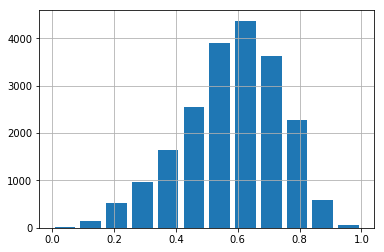

s13
STATISTICS
Mean: 0.3178711647518692
Median: 0.3088235294117112
Sum: 6557.999999995807
Min: 0.0
Max: 1.0
Total Count: 20631
Unique Values: 56
Missing Values: 0
Standard Deviation: 0.10576311132144779
Variance: 0.011185835716392957
VISUALIZATIONS
s13
Histogram


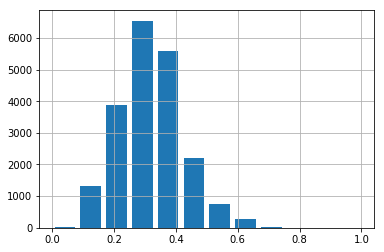

s14
STATISTICS
Mean: 0.2260951703849851
Median: 0.20951594591804934
Sum: 4664.569460212609
Min: 0.0
Max: 1.0
Total Count: 20631
Unique Values: 6078
Missing Values: 0
Standard Deviation: 0.09844243975618262
Variance: 0.009690913945149645
VISUALIZATIONS
s14
Histogram


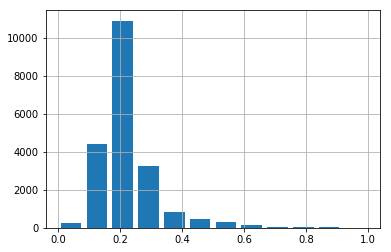

s15
STATISTICS
Mean: 0.4511180526792186
Median: 0.43863024240092585
Sum: 9307.01654482497
Min: 0.0
Max: 1.0
Total Count: 20631
Unique Values: 1918
Missing Values: 0
Standard Deviation: 0.14430564814146393
Variance: 0.020824120085527996
VISUALIZATIONS
s15
Histogram


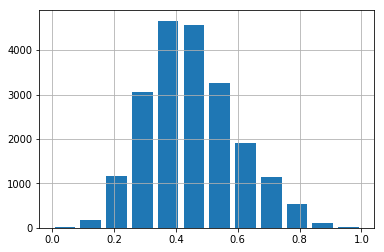

s16
STATISTICS
Mean: 0.0
Median: 0.0
Sum: 0.0
Min: 0.0
Max: 0.0
Total Count: 20631
Unique Values: 1
Missing Values: 0
Standard Deviation: 0.0
Variance: 0.0
VISUALIZATIONS
s16
Histogram


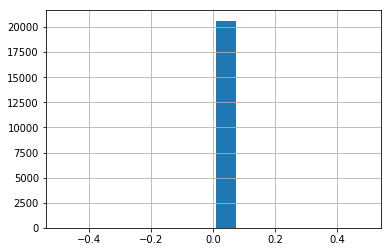

s17
STATISTICS
Mean: 0.4342211558657721
Median: 0.4166666666666714
Sum: 8958.416666666717
Min: 0.0
Max: 1.0
Total Count: 20631
Unique Values: 13
Missing Values: 0
Standard Deviation: 0.12906358538452264
Variance: 0.01665740907230797
VISUALIZATIONS
s17
Histogram


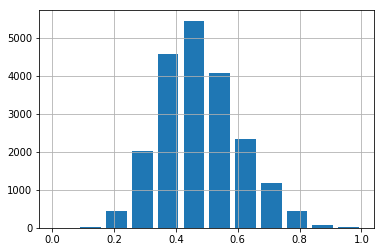

s18
STATISTICS
Mean: 0.0
Median: 0.0
Sum: 0.0
Min: 0.0
Max: 0.0
Total Count: 20631
Unique Values: 1
Missing Values: 0
Standard Deviation: 0.0
Variance: 0.0
VISUALIZATIONS
s18
Histogram


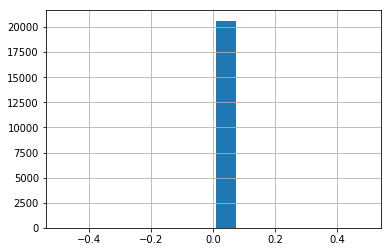

s19
STATISTICS
Mean: 0.0
Median: 0.0
Sum: 0.0
Min: 0.0
Max: 0.0
Total Count: 20631
Unique Values: 1
Missing Values: 0
Standard Deviation: 0.0
Variance: 0.0
VISUALIZATIONS
s19
Histogram


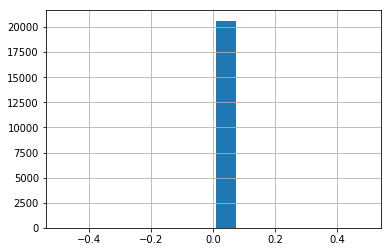

s20
STATISTICS
Mean: 0.5242408222141806
Median: 0.5348837209302282
Sum: 10815.612403100744
Min: 0.0
Max: 1.0
Total Count: 20631
Unique Values: 120
Missing Values: 0
Standard Deviation: 0.14011350997957905
Variance: 0.0196317956787976
VISUALIZATIONS
s20
Histogram


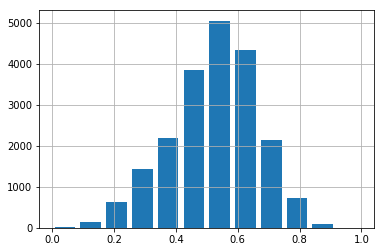

s21
STATISTICS
Mean: 0.5461272588576589
Median: 0.557442695388012
Sum: 11267.1514774924
Min: 0.0
Max: 1.0
Total Count: 20631
Unique Values: 4745
Missing Values: 0
Standard Deviation: 0.14947649094851193
Variance: 0.02234322134628057
VISUALIZATIONS
s21
Histogram


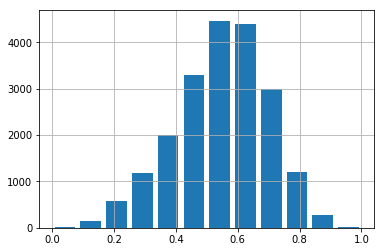

RUL
STATISTICS
Mean: 107.80786195530997
Median: 103.0
Sum: 2224184
Min: 0
Max: 361
Total Count: 20631
Unique Values: 362
Missing Values: 0
Standard Deviation: 68.8809901772182
Variance: 4744.590807794029
VISUALIZATIONS
RUL
Histogram


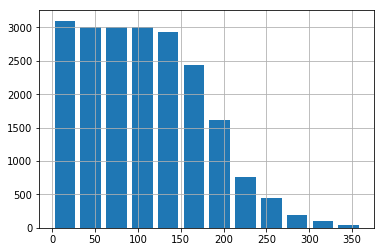

label1
STATISTICS
Mean: 0.15025931850128446
Median: 0.0
Sum: 3100
Min: 0
Max: 1
Total Count: 20631
Unique Values: 2
Missing Values: 0
Standard Deviation: 0.35733408012734597
Variance: 0.1276876448204565
VISUALIZATIONS
label1
Histogram


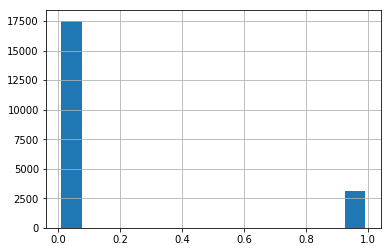

label2
STATISTICS
Mean: 0.2278125151471087
Median: 0.0
Sum: 4700
Min: 0
Max: 2
Total Count: 20631
Unique Values: 3
Missing Values: 0
Standard Deviation: 0.5753576383116651
Variance: 0.3310364119635768
VISUALIZATIONS
label2
Histogram


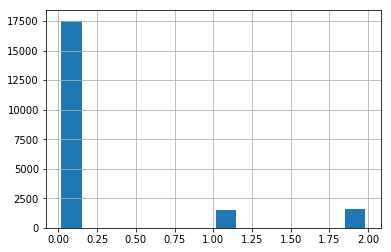

cycle_norm
STATISTICS
Mean: 0.2986367367183095
Median: 0.28531855955678675
Sum: 6161.174515235458
Min: 0.0
Max: 1.0
Total Count: 20631
Unique Values: 362
Missing Values: 0
Standard Deviation: 0.19080606697290395
Variance: 0.03640695519366831
VISUALIZATIONS
cycle_norm
Histogram


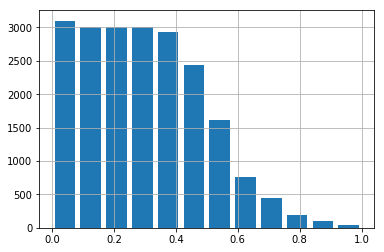

In [13]:
for col in train_df.columns:
  print("====================")
  print(col)
  print("====================")
  statistic_PdM(col)
  histogram_PdM(col)

Next, we prepare the test data. We first normalize the test data using the parameters from the MinMax normalization which is applied to training data.

In [14]:
test_df['cycle_norm'] = test_df['cycle']
norm_test_df = pd.DataFrame(min_max_scaler.transform(test_df[cols_normalize]), 
                            columns=cols_normalize, 
                            index=test_df.index)
test_join_df = test_df[test_df.columns.difference(cols_normalize)].join(norm_test_df)
test_df = test_join_df.reindex(columns = test_df.columns)
test_df = test_df.reset_index(drop=True)
test_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,cycle_norm
0,1,1,0.632184,0.750000,0.0,0.0,0.545181,0.310661,0.269413,0.0,1.0,0.652174,0.212121,0.127614,0.0,0.208333,0.646055,0.220588,0.132160,0.308965,0.0,0.333333,0.0,0.0,0.558140,0.661834,0.00000
1,1,2,0.344828,0.250000,0.0,0.0,0.150602,0.379551,0.222316,0.0,1.0,0.805153,0.166667,0.146684,0.0,0.386905,0.739872,0.264706,0.204768,0.213159,0.0,0.416667,0.0,0.0,0.682171,0.686827,0.00277
2,1,3,0.517241,0.583333,0.0,0.0,0.376506,0.346632,0.322248,0.0,1.0,0.685990,0.227273,0.158081,0.0,0.386905,0.699360,0.220588,0.155640,0.458638,0.0,0.416667,0.0,0.0,0.728682,0.721348,0.00554
3,1,4,0.741379,0.500000,0.0,0.0,0.370482,0.285154,0.408001,0.0,1.0,0.679549,0.196970,0.105717,0.0,0.255952,0.573561,0.250000,0.170090,0.257022,0.0,0.250000,0.0,0.0,0.666667,0.662110,0.00831
4,1,5,0.580460,0.500000,0.0,0.0,0.391566,0.352082,0.332039,0.0,1.0,0.694042,0.166667,0.102396,0.0,0.273810,0.737740,0.220588,0.152751,0.300885,0.0,0.166667,0.0,0.0,0.658915,0.716377,0.01108


Generate RUL for testing data

In [0]:
# generate column max for test data
rul = pd.DataFrame(test_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
truth_df.columns = ['more']
truth_df['id'] = truth_df.index + 1
truth_df['max'] = rul['max'] + truth_df['more']
truth_df.drop('more', axis=1, inplace=True)

In [16]:
# generate RUL for test data
test_df = test_df.merge(truth_df, on=['id'], how='left')
test_df['RUL'] = test_df['max'] - test_df['cycle']
test_df.drop('max', axis=1, inplace=True)
test_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,cycle_norm,RUL
0,1,1,0.632184,0.750000,0.0,0.0,0.545181,0.310661,0.269413,0.0,1.0,0.652174,0.212121,0.127614,0.0,0.208333,0.646055,0.220588,0.132160,0.308965,0.0,0.333333,0.0,0.0,0.558140,0.661834,0.00000,142
1,1,2,0.344828,0.250000,0.0,0.0,0.150602,0.379551,0.222316,0.0,1.0,0.805153,0.166667,0.146684,0.0,0.386905,0.739872,0.264706,0.204768,0.213159,0.0,0.416667,0.0,0.0,0.682171,0.686827,0.00277,141
2,1,3,0.517241,0.583333,0.0,0.0,0.376506,0.346632,0.322248,0.0,1.0,0.685990,0.227273,0.158081,0.0,0.386905,0.699360,0.220588,0.155640,0.458638,0.0,0.416667,0.0,0.0,0.728682,0.721348,0.00554,140
3,1,4,0.741379,0.500000,0.0,0.0,0.370482,0.285154,0.408001,0.0,1.0,0.679549,0.196970,0.105717,0.0,0.255952,0.573561,0.250000,0.170090,0.257022,0.0,0.250000,0.0,0.0,0.666667,0.662110,0.00831,139
4,1,5,0.580460,0.500000,0.0,0.0,0.391566,0.352082,0.332039,0.0,1.0,0.694042,0.166667,0.102396,0.0,0.273810,0.737740,0.220588,0.152751,0.300885,0.0,0.166667,0.0,0.0,0.658915,0.716377,0.01108,138


In [17]:

# generate label columns w0 and w1 for testing data
test_df['label1'] = np.where(test_df['RUL'] <= w1, 1, 0 )
test_df['label2'] = test_df['label1']
test_df.loc[test_df['RUL'] <= w0, 'label2'] = 2
test_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,cycle_norm,RUL,label1,label2
0,1,1,0.632184,0.750000,0.0,0.0,0.545181,0.310661,0.269413,0.0,1.0,0.652174,0.212121,0.127614,0.0,0.208333,0.646055,0.220588,0.132160,0.308965,0.0,0.333333,0.0,0.0,0.558140,0.661834,0.00000,142,0,0
1,1,2,0.344828,0.250000,0.0,0.0,0.150602,0.379551,0.222316,0.0,1.0,0.805153,0.166667,0.146684,0.0,0.386905,0.739872,0.264706,0.204768,0.213159,0.0,0.416667,0.0,0.0,0.682171,0.686827,0.00277,141,0,0
2,1,3,0.517241,0.583333,0.0,0.0,0.376506,0.346632,0.322248,0.0,1.0,0.685990,0.227273,0.158081,0.0,0.386905,0.699360,0.220588,0.155640,0.458638,0.0,0.416667,0.0,0.0,0.728682,0.721348,0.00554,140,0,0
3,1,4,0.741379,0.500000,0.0,0.0,0.370482,0.285154,0.408001,0.0,1.0,0.679549,0.196970,0.105717,0.0,0.255952,0.573561,0.250000,0.170090,0.257022,0.0,0.250000,0.0,0.0,0.666667,0.662110,0.00831,139,0,0
4,1,5,0.580460,0.500000,0.0,0.0,0.391566,0.352082,0.332039,0.0,1.0,0.694042,0.166667,0.102396,0.0,0.273810,0.737740,0.220588,0.152751,0.300885,0.0,0.166667,0.0,0.0,0.658915,0.716377,0.01108,138,0,0


### Feature Engineering


This work is for machinelearning based method. To eliminate it we can take advantages of deep learning based approach. For examle, convolutional Neural network, Recurrent neural Network,....

#### Forming training data to format of model

Use frame data from pandas to be fed by training model

In [64]:
train_df.head(200)
#train_df['id'].unique()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL,label1,label2,cycle_norm
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,1.0,0.726248,0.242424,0.109755,0.0,0.369048,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,191,0,0,0.000000
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,1.0,0.628019,0.212121,0.100242,0.0,0.380952,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,190,0,0,0.002770
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,1.0,0.710145,0.272727,0.140043,0.0,0.250000,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,189,0,0,0.005540
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,1.0,0.740741,0.318182,0.124518,0.0,0.166667,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,188,0,0,0.008310
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,1.0,0.668277,0.242424,0.149960,0.0,0.255952,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,187,0,0,0.011080
5,1,6,0.252874,0.416667,0.0,0.0,0.268072,0.292784,0.272113,0.0,1.0,0.776167,0.181818,0.125415,0.0,0.184524,0.637527,0.220588,0.169832,0.330512,0.0,0.250000,0.0,0.0,0.651163,0.652720,186,0,0,0.013850
6,1,7,0.557471,0.583333,0.0,0.0,0.382530,0.463920,0.261985,0.0,1.0,0.723027,0.181818,0.167818,0.0,0.303571,0.773987,0.220588,0.167097,0.278953,0.0,0.333333,0.0,0.0,0.744186,0.667219,185,0,0,0.016620
7,1,8,0.304598,0.750000,0.0,0.0,0.406627,0.259865,0.316003,0.0,1.0,0.644122,0.151515,0.085569,0.0,0.232143,0.805970,0.220588,0.160646,0.318199,0.0,0.250000,0.0,0.0,0.643411,0.574979,184,0,0,0.019391
8,1,9,0.545977,0.583333,0.0,0.0,0.274096,0.434707,0.211850,0.0,1.0,0.618357,0.227273,0.110967,0.0,0.261905,0.660981,0.250000,0.132883,0.184302,0.0,0.333333,0.0,0.0,0.705426,0.707539,183,0,0,0.022161
9,1,10,0.310345,0.583333,0.0,0.0,0.150602,0.440375,0.307394,0.0,1.0,0.602254,0.227273,0.134479,0.0,0.107143,0.660981,0.264706,0.151925,0.399000,0.0,0.416667,0.0,0.0,0.627907,0.794256,182,0,0,0.024931


In [0]:
sequence_length = 50
sequence_cols = ['setting1', 'setting2', 'setting3', 'cycle_norm']
# function to reshape features into (samples, time steps, features)
# assumming do not use padding for sequence that less than speciafic window, instead of, we will ignore them

def generate_sequence(id_df, seq_length, seq_cols):
  data_matrix = id_df[seq_cols].values
  num_elements = data_matrix.shape[0]
  print(data_matrix)
  print("number of elements: "+ str(num_elements))
  for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_matrix[start:stop, :]

  
# identity of sensors
sensor_cols = ['s' + str(i) for i in range(1,22)]
  
sequence_cols.extend(sensor_cols)
  
#generate_sequence(train_df[train_df['id']==1], sequence_length, sequence_cols)
# generator for the sequences
seq_gen = (list(generate_sequence(train_df[train_df['id']==id], sequence_length, sequence_cols)) 
           for id in [1])

# generate sequences and convert to numpy array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
seq_array.shape
print(seq_array)

In [0]:
# function to generate labels
def generate_labels(id_df, seq_length, label):
  data_matrix = id_df[label].values
  num_elements = data_matrix.shape[0]

### Binary based model

We solve problem using binary based approach. It means that if this enginee going to fail within W1 time points window.

In [30]:
import keras
import pandas

from keras.models import Sequential

from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

from keras.optimizers import Adam


#build a model using RNN layer
sequence_length = 50;
nb_features = 21;
nb_out = 1
binaryModel = Sequential()

binaryModel.add(LSTM(input_shape=(sequence_length, nb_features),
         units=100,
         return_sequences=True))
binaryModel.add(Dropout(0.5))

binaryModel.add(LSTM(units=50, return_sequences=False))
binaryModel.add(Dropout(0.5))

binaryModel.add(Dense(units=nb_out, activation='sigmoid'))
binaryModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

binaryModel.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 50, 100)           48800     
_________________________________________________________________
dropout_11 (Dropout)         (None, 50, 100)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 79,051
Trainable params: 79,051
Non-trainable params: 0
_________________________________________________________________
